In [1]:
import numpy as np
import pandas as pd

# Clase 2: Análisis Exploratorio de Datos (EDA) #

## Importando datos con Pandas ##

In [2]:
import os

COVID_URL = os.path.join('..', 'datasets', '201012COVID19MEXICO.csv')
print(COVID_URL)

..\datasets\201012COVID19MEXICO.csv


In [3]:
# Definir el tipo de dato hace el proceso más eficiente
types = {
    'ORIGEN': np.int8,
    'SECTOR': np.int8,
    'ENTIDAD_UM': np.int8,
    'SEXO': np.int8,
    'ENTIDAD_RES': np.int8,
    'MUNICIPIO_RES': np.int8,
    'TIPO_PACIENTE': np.int8,
    'FECHA_INGRESO': 'object',
    'FECHA_SINTOMAS': 'object',
    'FECHA_DEF': 'object',
    'INTUBADO': np.int8,
    'NEUMONIA': np.int8,
    'EDAD': np.int8,
    'NACIONALIDAD': np.int8,
    'EMBARAZO': np.int8,
    'HABLA_LENGUA_INDIG': np.int8,
    'INDIGENA': np.int8,
    'DIABETES': np.int8,
    'EPOC': np.int8,
    'ASMA': np.int8,
    'INMUSUPR': np.int8,
    'HIPERTENSION':np.int8,
    'OTRA_COM': np.int8,
    'CARDIOVASCULAR': np.int8,
    'OBESIDAD': np.int8,
    'RENAL_CRONICA': np.int8,
    'TABAQUISMO': np.int8,
    'OTRO_CASO': np.int8,
    'TOMA_MUESTRA': np.int8,
    'RESULTADO_LAB': np.int8,
    'CLASIFICACION_FINAL': np.int8,
    'MIGRANTE': np.int8,
    'PAIS_NACIONALIDAD': 'object',
    'PAIS_ORIGEN': 'object',
    'UCI': np.int8
}

In [4]:
# 'latin' porque contiene acentos
df = pd.read_csv(COVID_URL, encoding='latin', dtype=types)

In [5]:
df.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-10-12,071735,2,9,21,2,21,21,114,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
1,2020-10-12,1c4583,2,12,9,2,9,9,4,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
2,2020-10-12,0d55c9,2,12,9,1,9,9,16,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
3,2020-10-12,1468a5,1,4,5,1,15,5,18,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
4,2020-10-12,043f64,2,4,9,2,9,9,10,2,...,1,2,99,1,1,3,99,MÃ©xico,97,1


In [6]:
# Los tipos que definimos se respetan. Los otros se intuyen (no de manera óptima)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093408 entries, 0 to 2093407
Data columns (total 38 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   FECHA_ACTUALIZACION  object
 1   ID_REGISTRO          object
 2   ORIGEN               int8  
 3   SECTOR               int8  
 4   ENTIDAD_UM           int8  
 5   SEXO                 int8  
 6   ENTIDAD_NAC          int64 
 7   ENTIDAD_RES          int8  
 8   MUNICIPIO_RES        int8  
 9   TIPO_PACIENTE        int8  
 10  FECHA_INGRESO        object
 11  FECHA_SINTOMAS       object
 12  FECHA_DEF            object
 13  INTUBADO             int8  
 14  NEUMONIA             int8  
 15  EDAD                 int8  
 16  NACIONALIDAD         int8  
 17  EMBARAZO             int8  
 18  HABLA_LENGUA_INDIG   int8  
 19  INDIGENA             int8  
 20  DIABETES             int8  
 21  EPOC                 int8  
 22  ASMA                 int8  
 23  INMUSUPR             int8  
 24  HIPERTENSION         int

### Estrategia para el análisis ###

* Eliminar campos que no nos sirven ahora: ID Registro, Municipio de procedencia, Origen, Entidad_UM, Fecha de Síntomas, País de Origen, País de Nacionalidad, Migrante, Otro Caso, Tipo de Paciente, Habla lengua indígena, Fecha de actualización.
* Indagar y trabajar más sobre campos útiles: Fecha de actualización, Fecha de defunción, Fecha de ingreso.
* Identificar preguntas que queremos responder
    * ¿Cuántos hombres y mujeres se infectaron o fallecieron?
    * ¿Qué estados han sufrido más por el COVID?
    * ¿Cómo ha ido avanzando la pandemia en México?
    * ¿Cuál ha sido el rendimiento de los diferentes sistemas de salud durante la pandemia?
    * ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID?
    * ¿Cuál es el efecto de las complicaciones presentadas en lso infectados?
    * ¿Cómo se distribuyen los infectados y fallecidos según en el espectro de edades?
    * ¿Existe alguna correlación entre el tiempo en morir y las edades?

### Limpiando datos ###
Limpiar involucra el proceso de convertir los datos a un formato legible y eficiente para su procesamiento. En nuestro caso, eliminaremos ciertos campos y registros innecesarios, además de cambiar el formato de algunas columnas.

In [7]:
# Eliminamos columnas innecesarias
cols = ['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'ENTIDAD_UM', 'ENTIDAD_NAC',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'NACIONALIDAD', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'OTRO_CASO', 'TOMA_MUESTRA', 'RESULTADO_LAB', 'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN']
df.drop(cols, axis=1, inplace=True)

In [8]:
# Eliminamos registros no relacionados al COVID (casos negativos)
rows = df[df.CLASIFICACION_FINAL<=3].index
df.drop(rows, inplace=True)

In [9]:
# La memoria se ha reducido drásticamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272363 entries, 3949 to 2093407
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   SECTOR               1272363 non-null  int8  
 1   SEXO                 1272363 non-null  int8  
 2   ENTIDAD_RES          1272363 non-null  int8  
 3   FECHA_INGRESO        1272363 non-null  object
 4   FECHA_SINTOMAS       1272363 non-null  object
 5   FECHA_DEF            1272363 non-null  object
 6   INTUBADO             1272363 non-null  int8  
 7   NEUMONIA             1272363 non-null  int8  
 8   EDAD                 1272363 non-null  int8  
 9   EMBARAZO             1272363 non-null  int8  
 10  DIABETES             1272363 non-null  int8  
 11  EPOC                 1272363 non-null  int8  
 12  ASMA                 1272363 non-null  int8  
 13  INMUSUPR             1272363 non-null  int8  
 14  HIPERTENSION         1272363 non-null  int8  
 15  OTRA_COM    

### Transformando datos con datetime() y apply() ###
De vez en cuando debemos modificar los datos que ya tenemos o agregar nuevos dependiendo de la información del dataset.
* datetime() convierte datos de cualquier tipo al ofrmato Datatime, que permite condensar información sobre fechas, como años, meses, días, etc.
* apply() es una función que se aplica a cada columna o fila de un DataFrame, con el fin de calcular valores que serán retornado al final en forma de un Series. Normalmente es usado para hacer agregación de datos, pero igual puede ser utilizado para crear nuevos campos.

In [10]:
# Convertimos la fecha de tipo String a tipo Datetime
df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'], format='%Y-%m-%d')

In [11]:
# Ahora podemos saber el año, mes y día de forma más sencilla
df.iloc[5].FECHA_SINTOMAS.day # month, year

26

In [12]:
# FECHA_DEF no puede ser convertido directamente, debido a que posee fechas incorrectas ('9999-99-99')
# Establecemos 2000-01-01 como fecha de def. para los no fallecidos
fecha_modif = df.apply(lambda fila: '2000-01-01' if fila.FECHA_DEF=='9999-99-99' else fila.FECHA_DEF, axis='columns')
fecha_modif

3949       2000-01-01
3950       2000-01-01
3951       2000-01-01
3952       2000-01-01
3953       2000-01-01
              ...    
2093403    2000-01-01
2093404    2000-01-01
2093405    2000-01-01
2093406    2000-01-01
2093407    2000-01-01
Length: 1272363, dtype: object

In [13]:
# El resultado lo asignamos al campo...
df['FECHA_DEF'] = fecha_modif

In [14]:
# ...y luego lo convertimos.
df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'], format='%Y-%m-%d')

In [17]:
# Sobre la fecha de ingreso, sólo necesitamos el mes
df['FECHA_INGRESO'] = df.apply(lambda x: int(x.FECHA_INGRESO.split('-')[1]), axis='columns')

In [49]:
# Cambiamos el nombre de FECHA_INGRESO A MES_INGRESO
df.rename(columns={'FECHA_INGRESO': 'MES_INGRESO'}, inplace=True)

In [33]:
# Finalmente, agregamos un campo para filtrar con mayor comodidad
df['RESULTADO'] = df.apply(lambda x: 1 if x.FECHA_DEF.year==2000 else 0, axis='columns')

In [50]:
# Podemos ver que los tipos de dato han cambiado
# Podríamos mejorar el uso de memoria de datetime en un futuro
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272363 entries, 3949 to 2093407
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   SECTOR               1272363 non-null  int8          
 1   SEXO                 1272363 non-null  int8          
 2   ENTIDAD_RES          1272363 non-null  int8          
 3   MES_INGRESO          1272363 non-null  int64         
 4   FECHA_SINTOMAS       1272363 non-null  datetime64[ns]
 5   FECHA_DEF            1272363 non-null  datetime64[ns]
 6   INTUBADO             1272363 non-null  int8          
 7   NEUMONIA             1272363 non-null  int8          
 8   EDAD                 1272363 non-null  int8          
 9   EMBARAZO             1272363 non-null  int8          
 10  DIABETES             1272363 non-null  int8          
 11  EPOC                 1272363 non-null  int8          
 12  ASMA                 1272363 non-null  int8          

### Salvemos los datos ###
Todos los datos necesitan ser guardados en un archivo, normalmente un formato sencillo llamado CSV.

In [35]:
CLEAN_COVID_URL = os.path.join('..', 'datasets', 'Clean_Covid_Dataset.csv')
df.to_csv(CLEAN_COVID_URL)

In [36]:
!dir ..\datasets

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: E854-2EA9

 Directorio de C:\Users\Sebasti n\Desktop\MLDiv\data-analysis-workshop-mldiv\datasets

13/10/2020  12:59 a. m.    <DIR>          .
13/10/2020  12:59 a. m.    <DIR>          ..
12/10/2020  01:23 p. m.       328,967,538 201012COVID19MEXICO.csv
07/10/2020  05:23 p. m.            87,935 Catalogos_071020.xlsx
13/10/2020  01:19 a. m.        98,175,122 Clean_Covid_Dataset.csv
13/10/2020  12:44 a. m.    <DIR>          clean_data
07/10/2020  05:23 p. m.            15,552 Descriptores_071020.xlsx
               4 archivos    427,246,147 bytes
               3 dirs  77,560,999,936 bytes libres


In [37]:
# Creamos una función que guarde cualquier archivo
CLEAN_DATA_FOLDER = os.path.join('..', 'datasets', 'clean_data')

if not os.path.exists(CLEAN_DATA_FOLDER): os.mkdir(CLEAN_DATA_FOLDER)

def save_csv(df, name):
    file_url = os.path.join(CLEAN_DATA_FOLDER, f'{name}.csv')
    df.to_csv(file_url)

### Agrupaciones y Agregaciones ###
A veces, se necesita hacer una análisis no a todo el dataset, pero a grupos específicos del mismo. Normalmente lo que se desea es "agregar la información" o, en otras palabras, conseguir ciertos valores que describan esas poblaciones de datos.   
Agregaciones comunes son el promedio, la mediana, el rango, etc.

En esta sección responderemos las preguntas
* ¿Cuántos hombres y mujeres se infectaron o fallecieron?
* ¿Qué estados han sufrido más por el COVID?
* ¿Cómo ha ido avanzando la pandemia en México?
* ¿Cuál ha sido el rendimiento de los diferentes sistemas de salud durante la pandemia?
* ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID?
* ¿Qué tipo de complicaciones presentaron los hospitalizados?

#### ¿Cuántos hombres y mujeres se infectaron o fallecieron? ####

In [38]:
# Agrupemos por sexo y luego por resultado
covid_por_genero = df[['RESULTADO']].groupby([df['SEXO'], df['RESULTADO']]).count()
covid_por_genero

RESULTADO
SEXO RESULTADO           
1    0              13789
     1             658425
2    0              22483
     1             577666

In [39]:
# Reordenamos los datos
# unstack() crea una copia de los datos
covid_por_genero = covid_por_genero.unstack()
covid_por_genero.columns = pd.Index(['FALLECIDOS', 'INFECTADOS'])
covid_por_genero.index = pd.Index(['HOMBRES', 'MUJERES'])
covid_por_genero

,FALLECIDOS,INFECTADOS
HOMBRES,13789,658425
MUJERES,22483,577666


In [40]:
# Diseñamos una func. para simplificar el proceso anterior
def format_dataframe(data, index_arr):
    df = data.unstack()
    df.columns = pd.Index(['FALLECIDOS', 'INFECTADOS'])
    df.index = pd.Index(index_arr)
    return df

In [41]:
# Guardamos los datos
save_csv(covid_por_genero, 'covid_por_genero')

#### ¿Qué estados han sufrido más por el COVID? ####

In [42]:
# Agrupamos por estado y luego por resultado
covid_por_estado = df[['RESULTADO']].groupby([df['ENTIDAD_RES'], df['RESULTADO']]).count()
covid_por_estado

RESULTADO
ENTIDAD_RES RESULTADO           
1           0                227
            1              21416
2           0               1407
            1              33493
3           0                215
...                          ...
30          1              28203
31          0                530
            1              23467
32          0                252
            1              11374

[64 rows x 1 columns]

In [43]:
estados = [
    'AGUASCALIENTES',
    'BAJA CALIFORNIA',
    'BAJA CALIFORNIA SUR',
    'CAMPECHE',
    'COAHUILA',
    'COLIMA',
    'CHIAPAS',
    'CHIHUAHUA',
    'CDMX',
    'DURANGO',
    'GUANAJUATO',
    'GUERRERO',
    'HIDALGO',
    'JALISCO',
    'EDOMEX',
    'MICHOACAN',
    'MORELOS',
    'NAYARIT',
    'NUEVO LEON',
    'OAXACA',
    'PUEBLA',
    'QUERETARO',
    'Q. ROO',
    'SLP',
    'SINALOA',
    'SONORA',
    'TABASCO',
    'TAMAULIPAS',
    'TLAXCALA',
    'VERACRUZ',
    'YUCATAN',
    'ZACATECAS'
]

In [44]:
covid_por_estado = format_dataframe(covid_por_estado, estados)
covid_por_estado

,FALLECIDOS,INFECTADOS
AGUASCALIENTES,227,21416
BAJA CALIFORNIA,1407,33493
BAJA CALIFORNIA SUR,215,17855
CAMPECHE,268,11030
COAHUILA,876,46164
COLIMA,204,5487
CHIAPAS,664,30256
CHIHUAHUA,1456,18268
CDMX,6995,273240
DURANGO,251,19452


In [45]:
save_csv(covid_por_estado, 'covid_por_estado')

#### ¿Cómo ha ido avanzando la pandemia en México? ####

In [59]:
# ¿Cómo ha ido avanzando la pandemia en México?
covid_por_mes = df[['RESULTADO']].groupby([df['MES_INGRESO'], df['RESULTADO']]).count()
covid_por_mes

RESULTADO
MES_INGRESO RESULTADO           
1           0                488
            1              11199
2           0                407
            1              11082
3           0                638
            1              29301
4           0               4477
            1              82425
5           0               8363
            1             125122
6           0               6970
            1             187300
7           0               6064
            1             237406
8           0               4786
            1             228619
9           0               3519
            1             240087
10          0                560
            1              83550

In [54]:
meses = [
    'ENERO',
    'FEBRERO',
    'MARZO',
    'ABRIL',
    'MAYO',
    'JUNIO',
    'JULIO',
    'AGOSTO',
    'SEPTIEMBRE',
    'OCTUBRE'
]

In [55]:
covid_por_mes = format_dataframe(covid_por_mes, meses)
covid_por_mes

,FALLECIDOS,INFECTADOS
ENERO,488,11199
FEBRERO,407,11082
MARZO,638,29301
ABRIL,4477,82425
MAYO,8363,125122
JUNIO,6970,187300
JULIO,6064,237406
AGOSTO,4786,228619
SEPTIEMBRE,3519,240087
OCTUBRE,560,83550


In [56]:
save_csv(covid_por_mes, 'covid_por_mes')

#### ¿Cuál ha sido el rendimiento de los diferentes sistemas de salud durante la pandemia? ####

In [63]:
covid_por_sistema = df[['RESULTADO']].groupby([df['SECTOR'], df['RESULTADO']]).count()
covid_por_sistema

RESULTADO
SECTOR RESULTADO           
1      0                  3
       1                195
2      0                  7
       1                504
3      0                497
       1              19094
4      0              21639
       1             295399
5      0                292
       1               7901
6      0               2563
       1              43836
7      0                 14
       1                912
8      0                359
       1               9660
9      0                768
       1              48891
10     0               1107
       1               6176
11     0                189
       1               4039
12     0               8817
       1             798376
13     0                 17
       1               1098
99     1                 10

In [64]:
sistemas = [
    'CRUZ_ROJA',
    'DIF',
    'ESTATAL',
    'IMSS',
    'IMSS-BIENESTAR',
    'ISSSTE',
    'MUNICIPAL',
    'PEMEX',
    'PRIVADA',
    'SEDENA',
    'SEMAR',
    'SSA',
    'UNIVERSITARIO',
    'NO ESPECIFICADO'
]

In [65]:
covid_por_sistema = format_dataframe(covid_por_sistema, sistemas)
covid_por_sistema

,FALLECIDOS,INFECTADOS
CRUZ_ROJA,3.0,195.0
DIF,7.0,504.0
ESTATAL,497.0,19094.0
IMSS,21639.0,295399.0
IMSS-BIENESTAR,292.0,7901.0
ISSSTE,2563.0,43836.0
MUNICIPAL,14.0,912.0
PEMEX,359.0,9660.0
PRIVADA,768.0,48891.0
SEDENA,1107.0,6176.0


In [69]:
# Antes de guardar, necesitamos rellenar el dato vacío y optimizar el DF
covid_por_sistema = covid_por_sistema.fillna(0)
covid_por_sistema = covid_por_sistema.astype(np.int8)

In [72]:
covid_por_sistema

,FALLECIDOS,INFECTADOS
CRUZ_ROJA,3,-61
DIF,7,-8
ESTATAL,-15,-106
IMSS,-121,-25
IMSS-BIENESTAR,36,-35
ISSSTE,3,60
MUNICIPAL,14,-112
PEMEX,103,-68
PRIVADA,0,-5
SEDENA,83,32


In [73]:
save_csv(covid_por_sistema, 'covid_por_sistema')

### Concatenando DataFrames ###
Otra función común al hacer análissi de datos, es juntar dos o más DataFrames. Aunque se pueden hacer combinaciones interesantes con merge() y join(), en este caso sólo necesitamos "pegar" dos DataFrames, no mezclarlos.

Aquí respondemos las preguntas:
* ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID?
* ¿Cuál es el efecto de las complicaciones presentadas en lso infectados?

#### ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID? ¿Cuántos muertos han producido estas enfermedades preexistentes? ####

In [74]:
# Primero seleccionamos los registros de personas con HIPERTENSIÓN
# Luego agrupamos por personas fallecidas y no fallecidas
# Calculamos el número de registros en cada grupo
# Y seleccionamos el campo de HIPERTENSIÓN para un mejor presentación
covid_por_hiper = df[df['HIPERTENSION']==1].groupby([df['RESULTADO']]).count()[['HIPERTENSION']]
covid_por_hiper

,HIPERTENSION
RESULTADO,
0,15091
1,154018


In [75]:
# Para poder concatenarlo, tomamos la transpuesta
covid_por_hiper = covid_por_hiper.T
covid_por_hiper

RESULTADO,0,1
HIPERTENSION,15091,154018


In [76]:
# Hacemos lo mismo para personas con enfermedades CARDIOVASCULARes
covid_por_cardio = df[df['CARDIOVASCULAR']==1].groupby(df['RESULTADO']).count()[['CARDIOVASCULAR']]
covid_por_cardio

,CARDIOVASCULAR
RESULTADO,
0,2509
1,20030


In [77]:
covid_por_cardio = covid_por_cardio.T
covid_por_cardio

RESULTADO,0,1
CARDIOVASCULAR,2509,20030


In [78]:
# Concatenamos para tener una mejor presentación
covid_por_hiper.append(covid_por_cardio)

RESULTADO,0,1
HIPERTENSION,15091,154018
CARDIOVASCULAR,2509,20030


Todo este proceso de agrupación y agregación es tedioso. Diseñaremos una función que haga este proceso y que además concatene los DataFrames por nosotros.

In [81]:
enfermedades = ['EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
                'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD',
                'RENAL_CRONICA', 'TABAQUISMO', 'OTRA_COM']

In [79]:
# Diseñamos una función que lo haga por nosotros
def results_by_affection(data, affections):
    res = None
    isFirst = True
    for affec in affections:
        a = df[df[affec]==1][[affec]].groupby([df['RESULTADO']]).count()
        a = a.T
        if (isFirst):
            res = a
            isFirst = False
        else:
            res = res.append(a)
    return res

In [82]:
covid_por_enf = results_by_affection(df, enfermedades)
covid_por_enf

RESULTADO,0,1
EMBARAZO,43,11514
DIABETES,13289,109040
EPOC,2293,12856
ASMA,635,37453
INMUSUPR,1713,14354
HIPERTENSION,15091,154018
CARDIOVASCULAR,2509,20030
OBESIDAD,6456,160559
RENAL_CRONICA,3739,16528
TABAQUISMO,3348,105909


In [85]:
# Hacemos un pequeño cambio
covid_por_enf.columns = pd.Index(['FALLECIDOS', 'INFECTADOS'])
covid_por_enf

,FALLECIDOS,INFECTADOS
EMBARAZO,43,11514
DIABETES,13289,109040
EPOC,2293,12856
ASMA,635,37453
INMUSUPR,1713,14354
HIPERTENSION,15091,154018
CARDIOVASCULAR,2509,20030
OBESIDAD,6456,160559
RENAL_CRONICA,3739,16528
TABAQUISMO,3348,105909


In [86]:
save_csv(covid_por_enf, 'covid_por_enf')

#### ¿Cuál es el efecto de las complicaciones presentadas en los infectados? ####

In [87]:
complicaciones = ['INTUBADO', 'NEUMONIA', 'UCI']

In [88]:
# Aplicamos la misma función que en la pregunta anterior
covid_por_comp = results_by_affection(df, complicaciones)
covid_por_comp

RESULTADO,0,1
INTUBADO,9250,6087
NEUMONIA,22025,74136
UCI,3393,8141


In [89]:
# Hacemos otro pequeño cambio
covid_por_comp.columns = pd.Index(['FALLECIDOS', 'INFECTADOS'])
covid_por_comp

,FALLECIDOS,INFECTADOS
INTUBADO,9250,6087
NEUMONIA,22025,74136
UCI,3393,8141


In [90]:
save_csv(covid_por_comp, 'covid_por_comp')

### Binning: Pasando datos numéricos a categóricos ###
La discretización es el proceso de convertir variables una variable continua (números con decimales) a una discreta (números enteros).   
Podríamos usar otra vez apply() para crear un campo nuevo 'RANGO_EDAD' basado en lo contenido dentro del campo 'EDAD', pero Pandas ya viene con una función para hacer todo ese trabajo más fácil.

En esta sección responderemos la pregunta
* ¿Cómo se distribuyen los infectados y fallecidos según en el espectro de edades?

In [100]:
# pd.cut() permite generar categorías basadas en rangos de números
df['RANGO_EDAD'] = pd.cut(df['EDAD'], [0,3,12,20,40,65,np.inf], labels=range(6), right=False)

In [102]:
# Agrupamos por dos campos y luego contamos los registros
covid_por_edades = df[['RANGO_EDAD']].groupby([df['RANGO_EDAD'], df['RESULTADO']]).count()
covid_por_edades

RANGO_EDAD
RANGO_EDAD RESULTADO            
0          0                 447
           1               17155
1          0                 215
           1               32783
2          0                 237
           1               55607
3          0                2845
           1              566396
4          0               15891
           1              475737
5          0               16637
           1               88413

La tabla puede estar más elegante

In [103]:
edades = [
    'BEBÉ',
    'INFANTE',
    'ADOLESCENTE',
    'JOVEN',
    'ADULTO',
    'ADULTO MAYOR'
]

In [104]:
format_dataframe(covid_por_edades, edades)

,FALLECIDOS,INFECTADOS
BEBÉ,447,17155
INFANTE,215,32783
ADOLESCENTE,237,55607
JOVEN,2845,566396
ADULTO,15891,475737
ADULTO MAYOR,16637,88413


In [105]:
save_csv(covid_por_edades, 'covid_por_edades')

### Correlaciones ###
Las correlaciones indican si los cambios entre dos o más variables están ligados. En su mayoría esas relaciones pueden ser lineales, siendo posible su cuentificación mediante el coeficiente de Pearson, aunque visualizar la correlación también es útil.


En esta sección respondemos la pregunta
* ¿Existe alguna correlación entre el tiempo en morir y las edades?

In [107]:
# Creamos una función que, por cada paciente, nos diga los días
#  que tardó en fallecer
def calc_days_alive(row):
    time = 0
    if (row.RESULTADO==0):
        time = row.FECHA_DEF - row.FECHA_SINTOMAS
        time = time.days
    return time

In [108]:
# Aplicamos la func. y creamos un nuevo campo
df['DIAS_VIVO'] = df.apply(calc_days_alive, axis='columns')

In [121]:
df[df['DIAS_VIVO']<0].head(5)

,SECTOR,SEXO,ENTIDAD_RES,MES_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL,UCI,RESULTADO,RANGO_EDAD,DIAS_VIVO
721644,4,2,9,6,2020-05-17,2020-05-05,1,2,68,97,...,2,2,2,2,2,6,1,0,5,-12
724548,4,2,9,4,2020-04-17,2020-04-15,2,2,60,97,...,2,2,2,1,2,6,2,0,4,-2
739651,4,1,9,5,2020-05-24,2020-04-13,2,1,56,2,...,2,2,2,2,2,6,2,0,4,-41
741764,4,1,9,5,2020-05-31,2020-05-06,97,1,48,2,...,2,2,2,2,2,6,97,0,4,-25
793882,4,2,15,4,2020-04-22,2020-04-21,2,1,55,97,...,2,2,2,2,2,6,2,0,4,-1


In [117]:
# Coeficientes de Correlacion Lineal sólo para los fallecidos
df[df['RESULTADO']==0][['EDAD', 'DIAS_VIVO']].corr()

,EDAD,DIAS_VIVO
EDAD,1.000000,-0.029532
DIAS_VIVO,-0.029532,1.000000


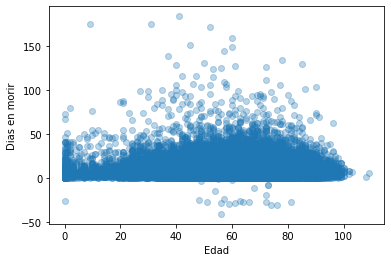

In [125]:
# Graficar correlación sólo de personas fallecidas
import matplotlib.pyplot as plt

x = df[df['RESULTADO']==0]['EDAD']
y = df[df['RESULTADO']==0]['DIAS_VIVO']
plt.scatter(x=x, y=y, alpha=0.3)
plt.xlabel('Edad')
plt.ylabel('Dias en morir')
plt.show()

Podemos observar que hay gente que tiene un tiempo de vida negativo. Quizá sea un error al capturar los datos.

### Otras cosas más que aprender de Pandas ###
Pandas puede hacer una multitud de tareas
* Unir dos o más DataFrames según diferentes reglas (usando join() y merge())
* Reordenar los registros según condiciones específicas
* Indexado Jerárquico: Columnas que tienen columnas
* Manejo más eficiente de memeoria y CPU, usando librerías como Spark, etc
* Tablas de Pivote
* Integración con otras librerías, como scikit-learn
* Análisis de series de tiempo